# 1ª PARTE DO PROJETO

### Deep Learning Aplicado 2024/2025

María Amparo Báguena Fernández - 
Nº 2024155132


# 1. Caracterização dos Dados
## 1.1 Descrição do Conjunto de Dados
1. **Dimensões**:
   - **Número de linhas**: 649 (estudantes).
   - **Número de colunas**: 33 (variáveis).

2. **Tipos de Dados**:
   - **Categóricos**:
     - Exemplos: `school`, `sex`, `address`, `famsize`, `Mjob`, `Fjob`, entre outros.
   - **Numéricos**:
     - Exemplos: `age`, `traveltime`, `studytime`, `failures`, `absences`, `G1`, `G2`, `G3` (notas).

3. **Variáveis Principais**:
   - **Variável dependente**:
       - `G3` (nota final dos estudantes):Métrica principal para avaliar o desempenho acadêmico.
   - **Variáveis independentes**:
     - **Socioeconômicas**:
         - Nível educacional dos pais (`Medu`, `Fedu`): Nível educacional dos pais influencia nas notas.
         - ocupação dos pais (`Mjob`, `Fjob`).
     - **Acadêmicas**:
         - Tempo de estudo (`studytime`): Relacionado a um melhor desempenho.
         - Apoio escolar (`schoolsup`, `famsup`).
         - Antecedentes de reprovações (`failures`).
     - **Outras**:
         - Atividades extracurriculares.
         - Conexão à Internet (`internet`).
         - Relações familiares (`famrel`): Influencia no bem-estar emocional.



## 1.2 Exploração Inicial dos Dados
Realizamos uma análise exploratória para entender melhor as variáveis. Observamos distribuições gerais, calculamos estatísticas descritivas e geramos visualizações para identificar padrões.


In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   

In [2]:
# Ler o arquivo de dados
dataset_path = 'student-por.csv'
df = pd.read_csv(dataset_path)

In [3]:
# Visualização inicial do dataframe
print(f"Dimensões do conjunto de dados: {df.shape}")

# Usar display() e estilizar as primeiras linhas do dataframe
display(df.head().style.set_caption("Primeiras Linhas do Dataset").set_table_styles(
    [{'selector': 'caption', 'props': 'caption-side: top; font-size: 16px; color: black; font-weight: bold;'}]
))

Dimensões do conjunto de dados: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
# Informações básicas das colunas
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# Estatísticas descritivas para variáveis numéricas

print("Estatísticas descritivas para variáveis numéricas:")

# Usar display() e estilizar o output do descritivo
display(df.describe().style.set_caption("Estatísticas Descritivas").set_table_styles(
    [{'selector': 'caption', 'props': 'caption-side: top; font-size: 16px; color: black; font-weight: bold;'}]
).format("{:.2f}"))  # 2 decimais


Estatísticas descritivas para variáveis numéricas:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


In [6]:
# Distribuições de variáveis categóricas
print("Distribuições das variáveis categóricas:\n")

# Iterar sobre as colunas categóricas e mostrar suas distribuições em tabelas estilizadas
for column in df.select_dtypes(include='object').columns:
    value_counts = df[column].value_counts()
    display(value_counts.to_frame(name='Frecuencia')
            .style.set_caption(f"Distribuição da variável '{column}'")
            .set_table_styles(
                [{'selector': 'caption', 'props': 'caption-side: top; font-size: 16px; color: black; font-weight: bold;'}]
            )
            .format("{:.0f}"))  # Inteiros

Distribuições das variáveis categóricas:



,Frecuencia
GP,423
MS,226


,Frecuencia
F,383
M,266


,Frecuencia
U,452
R,197


,Frecuencia
GT3,457
LE3,192


,Frecuencia
T,569
A,80


,Frecuencia
other,258
services,136
at_home,135
teacher,72
health,48


,Frecuencia
other,367
services,181
at_home,42
teacher,36
health,23


,Frecuencia
course,285
home,149
reputation,143
other,72


,Frecuencia
mother,455
father,153
other,41


,Frecuencia
no,581
yes,68


,Frecuencia
yes,398
no,251


,Frecuencia
no,610
yes,39


,Frecuencia
no,334
yes,315


,Frecuencia
yes,521
no,128


,Frecuencia
yes,580
no,69


,Frecuencia
yes,498
no,151


,Frecuencia
no,410
yes,239


### Gráficos 

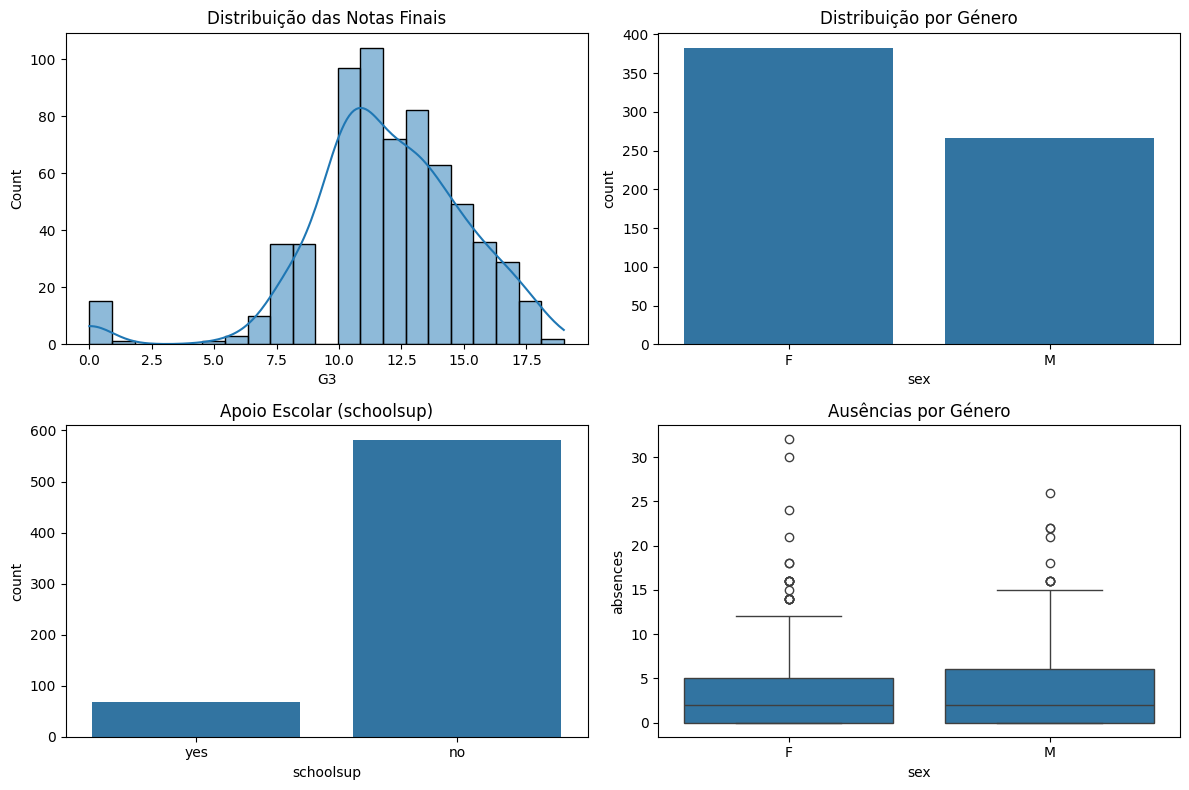

In [7]:
# Dividindo a janela em 4 gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histograma para as notas finais
sns.histplot(df['G3'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição das Notas Finais')

# Gráfico de barras para o género
sns.countplot(x='sex', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição por Género')

# Gráfico de barras para o apoio escolar
sns.countplot(x='schoolsup', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Apoio Escolar (schoolsup)')

# Boxplot para as ausências
sns.boxplot(x='sex', y='absences', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Ausências por Género')

plt.tight_layout()
plt.show()


### Explicação da Escolha das Variáveis e Tipos de Gráficos

1. **Histograma para as Notas Finais (`G3`)**:

A variável `G3` representa a nota final dos estudantes e é a variável dependente principal do conjunto de dados. É crucial entender como as notas estão distribuídas para identificar padrões gerais de desempenho.
O histograma permite observar a distribuição das notas finais (frequência) e identificar se há uma concentração em faixas específicas, como notas médias, altas ou baixas. Além disso, o uso da densidade (curva KDE) ajuda a compreender a forma da distribuição (simétrica, enviesada, etc.). Se pretende identificar o desempenho geral dos estudantes e possíveis padrões na distribuição das notas finais.

2. **Gráfico de Barras para o Género (`sex`)**:

A variável `sex` categoriza os estudantes por género (`M` para masculino e `F` para feminino). Essa informação é importante para analisar possíveis diferenças no desempenho acadêmico e outros fatores entre os géneros.
Um gráfico de barras mostra claramente a frequência de cada categoria, permitindo visualizar o equilíbrio ou desequilíbrio entre géneros no conjunto de dados. Se pretende entender a representatividade dos géneros no conjunto de dados e possíveis desequilíbrios.

3. **Gráfico de Barras para o Apoio Escolar (`schoolsup`)**:

O apoio escolar (`schoolsup`) é uma variável binária (`yes` ou `no`) que indica se o estudante recebeu apoio adicional. Essa informação é relevante para investigar o impacto do apoio escolar no desempenho académico (`G3`).
Este tipo de gráfico facilita a visualização da proporção de estudantes que recebem ou não apoio escolar. Compreender esta distribuição é um passo importante para estudos futuros que explorem a relação entre apoio escolar e desempenho. Se pretende avaliar a proporção de estudantes que recebem apoio escolar e preparar para análises sobre o impacto desse apoio.

4. **Boxplot para as Ausências por Género (`absences` e `sex`)**:

A variável `absences` indica o número de faltas dos estudantes, enquanto `sex` categoriza os dados por género. Faltas frequentes podem impactar negativamente o desempenho, e queremos verificar se há diferenças significativas entre géneros neste aspecto.
O boxplot é ideal para comparar distribuições entre categorias (`M` e `F`), mostrando a mediana, os quartis e possíveis valores atípicos. Com ele, é possível identificar padrões como géneros com maior número de faltas ou maior variabilidade. Se pretende examinar diferenças entre géneros no número de faltas e como isso pode estar relacionado ao desempenho.


## 1.3 Identificação de Valores Ausentes


In [8]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

# Calcular a porcentagem de valores ausentes
missing_percentage = (missing_values / len(df)) * 100
print("Porcentagem de valores ausentes por coluna:")
print(missing_percentage)
    

Valores ausentes por coluna:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Porcentagem de valores ausentes por coluna:
school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet

## 1.4 Anàlisis de Correlacion

In [9]:
# Selecionar variáveis relevantes para análise
variables_interes = ['G3', 'studytime', 'absences', 'Medu', 'Fedu', 'failures']
df_corr = df[variables_interes]

# Calcular a matriz de correlação
correlation_matrix = df_corr.corr()

# Mostrar matriz de correlação
print("Matriz de Correlação:")
display(correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2))

Matriz de Correlação:


C:\Users\Amparo\AppData\Local\Temp\ipykernel_22380\2103745060.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2))


,G3,studytime,absences,Medu,Fedu,failures
G3,1.00,0.25,-0.09,0.24,0.21,-0.39
studytime,0.25,1.00,-0.12,0.10,0.05,-0.15
absences,-0.09,-0.12,1.00,-0.01,0.03,0.12
Medu,0.24,0.10,-0.01,1.00,0.65,-0.17
Fedu,0.21,0.05,0.03,0.65,1.00,-0.17
failures,-0.39,-0.15,0.12,-0.17,-0.17,1.00


### Análise dos resultados

**1. Variáveis que têm maior correlação com `G3`**
- A variável **`failures`** (reprovações) apresenta a correlação mais forte com `G3`, com um valor de **-0.39**. Isto indica uma relação negativa moderada: quanto maior o número de reprovações, menor será a nota final (`G3`).
- **`studytime`** (tempo de estudo) tem uma correlação positiva de **0.25** com `G3`. Embora não seja uma correlação muito alta, sugere que mais tempo de estudo está associado a melhores notas finais.
- **`Medu`** (nível educacional da mãe) também tem uma correlação positiva de **0.24**, o que pode indicar que o nível educacional dos pais está relacionado com o desempenho académico.


**2. Relações inesperadas ou contrárias à intuição**
- A variável **`absences`** (faltas) apresenta uma correlação muito baixa e negativa com `G3` (**-0.09**). Poderíamos esperar uma relação mais forte, pois faltas frequentes tendem a afectar o desempenho académico. Este resultado sugere que, neste conjunto de dados, as faltas não são um factor significativo.
- As variáveis **`Medu`** e **`Fedu`** (nível educacional da mãe e do pai) apresentam uma correlação positiva elevada entre si (**0.65**), o que é esperado, mas indica que podem ser redundantes em análises futuras.


**3. Variáveis que parecem ter pouca ou nenhuma relação com as notas finais**
- **`absences`** (faltas) apresenta uma correlação próxima de 0 (**-0.09**) com `G3`. Isto indica que, neste conjunto de dados, as faltas não são um factor determinante para as notas finais.
- **`Fedu`** (nível educacional do pai) também apresenta uma correlação baixa com `G3` (**0.21**), o que sugere que o seu impacto é menor em comparação com outras variáveis, como `Medu` ou `failures`.

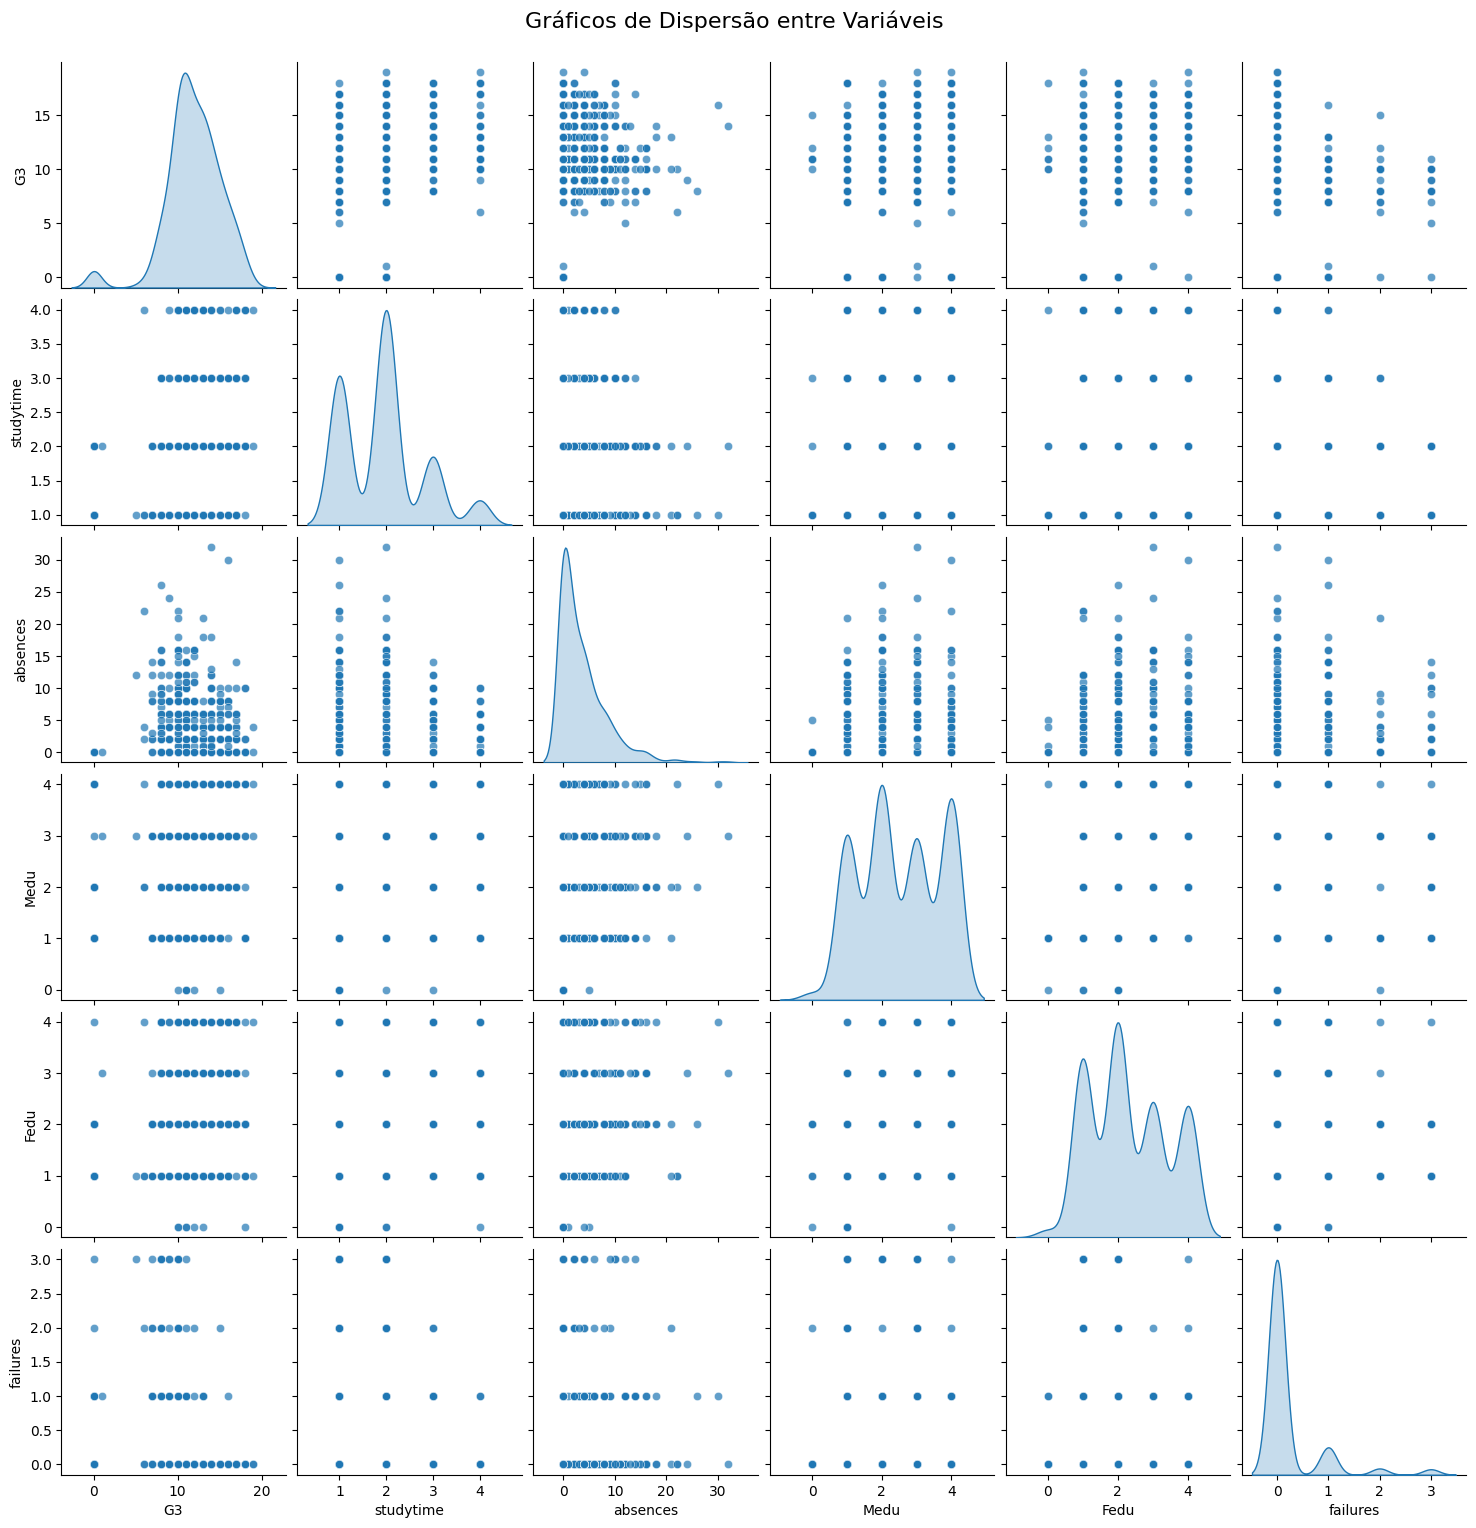

In [10]:
# Gráficos de dispersão para explorar relações entre variáveis
sns.pairplot(df_corr, kind="scatter", diag_kind="kde", plot_kws={'alpha': 0.7})
plt.suptitle('Gráficos de Dispersão entre Variáveis ', y=1.02, fontsize=16)
plt.show()

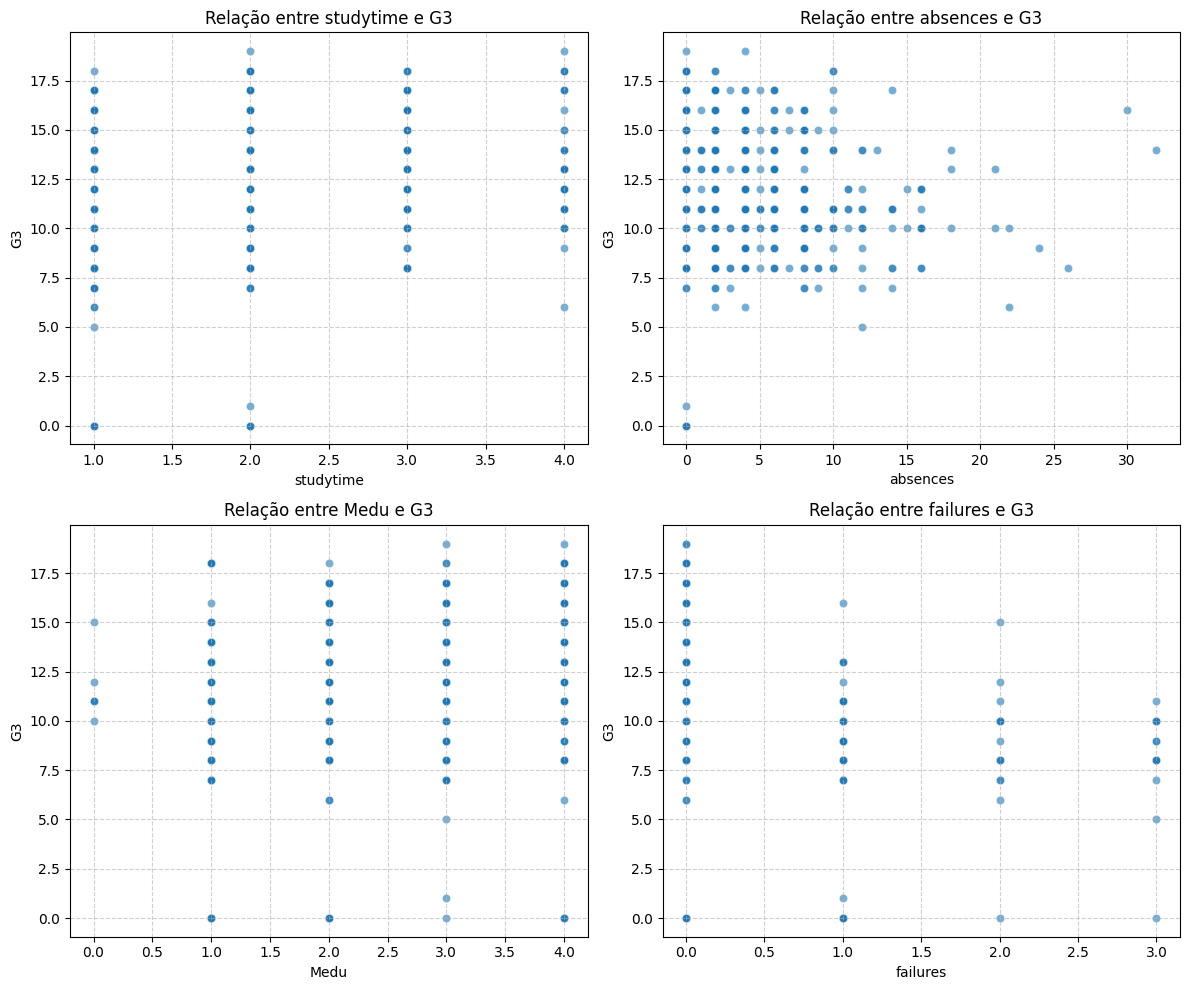

In [11]:
# Relação entre 'G3' e outras variáveis
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
variables_relacion = ['studytime', 'absences', 'Medu', 'failures']

for idx, var in enumerate(variables_relacion):
    row, col = divmod(idx, 2)
    sns.scatterplot(x=var, y='G3', data=df, ax=axs[row, col], alpha=0.6)
    axs[row, col].set_title(f'Relação entre {var} e G3')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('G3')
    axs[row, col].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### **Conclusão da análise do correlaçao**
1. As variáveis mais relevantes para prever `G3` são:
   - **`failures`** (relação negativa moderada).
   - **`studytime`** (relação positiva leve a moderada).
   - **`Medu`** (nível educacional da mãe).

2. As variáveis com menor impacto nas notas finais são:
   - **`absences`** (faltas).
   - **`Fedu`** (nível educacional do pai).

Esta análise sugere que variáveis como reprovações e tempo de estudo são mais significativas para o desempenho académico do que factores como faltas ou o nível educacional do pai, neste conjunto de dados.


## Conclusões e Resumos
1. **Distribuição das Notas**:
   - A maior parte dos estudantes tem notas finais (G3) entre 10 e 14, indicando um desempenho médio.

2. **Impacto do Apoio Escolar**:
   - Os dados mostram que uma minoria dos estudantes recebe apoio escolar (schoolsup), o que pode ser analisado em relação ao desempenho.

3. **Género e Ausências**:
   - Homens tendem a ter mais ausências do que mulheres, o que pode influenciar no rendimento acadêmico.

4. **Recomendações**:
   - Investigar o impacto do apoio escolar e o tempo de estudo no desempenho.
   - Considerar o efeito das ausências nas notas finais.

# 2. Estado da Arte

1. **"Factores socioeconómicos asociados al rendimiento académico de estudiantes universitarios"**
[Link Artigo 1](https://www.scielo.org.mx/scielo.php?pid=S2007-78902021000700007&script=sci_arttext)



- **Metodologia**: Este estudo examina a relação entre fatores socioeconómicos e o desempenho acadêmico de estudantes universitários. Foram analisadas variáveis como nível socioeconômico da família, ocupação e escolaridade dos pais, utilizando dados de exames padronizados e médias do bacharelado. 

- **Resultados**: Foi encontrado que o desempenho acadêmico está associado com todos os fatores socioeconômicos propostos, destacando-se que estudantes de setores mais vulneráveis enfrentam maiores desafios para continuar seus estudos universitários. Além disso, foi observado que a média do bacharelado prediz melhor o desempenho acadêmico futuro em comparação com exames padronizados.

- **Relevância**: Os resultados destacam a importância de considerar fatores socioeconômicos ao analisar o desempenho acadêmico, que é crucial para o objetivo do projeto de prever o sucesso escolar.


2. **"Algoritmos de aprendizaje automático para la predicción del logro académico"** [Link Artigo 2](https://www.scielo.org.mx/scielo.php?pid=S2007-74672022000100035&script=sci_arttext)

- **Metodologia**: Este artigo implementa dois classificadores de aprendizado de máquina: uma rede neural multicamada (Multilayer Perceptron, MLP) e um modelo de potencialização de gradiente (Gradient Boosting, GB), para prever o desempenho acadêmico em espanhol e matemática de alunos do ensino fundamental e médio. Foram utilizadas variáveis contextuais obtidas de exames nacionais.

- **Resultados**: Ambos os modelos mostraram uma precisão significativa na previsão do desempenho acadêmico, destacando a eficácia das técnicas de machine learning neste campo.
  
- **Relevância**: A aplicação de algoritmos de machine learning na previsão do desempenho acadêmico demonstra seu potencial para identificar alunos em risco e melhorar estratégias educacionais, alinhando-se com o objetivo do projeto.

3. **"Predicción del rendimiento académico como indicador de éxito/fracaso de estudiantes universitarios"** [Link Artigo 3](https://www.scielo.cl/scielo.php?pid=S0718-50062020000500233&script=sci_arttext)

- **Metodologia**: Este estudo propõe um modelo usando algoritmos de aprendizado de máquina, como árvores de decisão e k-vizinhos mais próximos, para prever o desempenho acadêmico de estudantes de engenharia. Métodos de seleção de variáveis foram usados para identificar as mais influentes na previsão.

- **Resultados**: O algoritmo de perceptrão mostrou a melhor precisão na previsão. Variáveis como gênero e pontuação em exames de status foram identificadas como fatores determinantes no desempenho acadêmico.

- **Relevância**: Este artigo destaca a importância de selecionar adequadamente as variáveis na construção de modelos preditivos do desempenho acadêmico, fornecendo informações valiosas para o desenvolvimento de modelos no projeto.

## Bibliografia

1. Autor(es). (2021). Factores socioeconómicos asociados al rendimiento académico de estudiantes universitarios. Revista Iberoamericana sobre Calidad, Eficacia y Cambio en Educación, 19(4), 7-25. Recuperado de https://www.scielo.org.mx/scielo.php?pid=S2007-78902021000700007&script=sci_arttext

2. Autor(es). (2022). Algoritmos de aprendizaje automático para la predicción del logro académico. Revista Electrónica de Investigación Educativa, 24(1), 35-53. Recuperado de https://www.scielo.org.mx/scielo.php?pid=S2007-74672022000100035&script=sci_arttext

3. Autor(es). (2020). Predicción del rendimiento académico como indicador de éxito/fracaso de estudiantes universitarios. Formación Universitaria, 13(5), 233-243. Recuperado de https://www.scielo.cl/scielo.php?pid=S0718-50062020000500233&script=sci_arttext